In [61]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

In [2]:
import ENDF6el as el
import flux_recoil_spec as frs
import importlib
import time

In [91]:
importlib.reload(frs)
importlib.reload(el)
#get Er vector
Er= np.geomspace(100/1e7, 1.0, 100)
print(np.shape(Er))
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-4)
start = time.time()
isoGe,isodictGe=frs.dRdErCompound(Er,E,F,N=1,Comp='Ge')
end = time.time()
print('Evaluation Time: {:1.5f} sec.'.format(end-start))

(100,)
fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009995281867072022 0.01
Compound Isotope Breakdown Sum (should be 1.0):1.0
{'Ge[74]': {'a': 0.3672, 'Z': 32, 'A': '74', 'Symbol': 'Ge'}, 'Ge[72]': {'a': 0.2731, 'Z': 32, 'A': '72', 'Symbol': 'Ge'}, 'Ge[70]': {'a': 0.2038, 'Z': 32, 'A': '70', 'Symbol': 'Ge'}, 'Ge[76]': {'a': 0.0783, 'Z': 32, 'A': '76', 'Symbol': 'Ge'}, 'Ge[73]': {'a': 0.0776, 'Z': 32, 'A': '73', 'Symbol': 'Ge'}}
1.206213656957064e-25
74 32 Ge
../data_files/xn_data/ge74_el.txt ../data_files/xn_data/n-032_Ge_074.endf
72 32 Ge
../data_files/xn_data/ge72_el.txt ../data_files/xn_data/n-032_Ge_072.endf
70 32 Ge
../data_files/xn_data/ge70_el.txt ../data_files/xn_data/n-032_Ge_070.endf
76 32 Ge
../data_files/xn_data/ge76_el.txt ../data_files/xn_dat

In [92]:
print(isoGe)
print(isodictGe)

[[ 1.97762818e+01  1.51089518e+01  1.37741821e+01  2.42779901e+01
   1.49115594e+01  5.60710840e+01]
 [ 1.89671070e+01  1.46872334e+01  1.32107701e+01  2.35556945e+01
   1.39985955e+01  5.24401159e+01]
 [ 1.78406298e+01  1.42647670e+01  1.26788790e+01  2.28776963e+01
   1.33561033e+01  4.42235582e+01]
 [ 1.73434038e+01  1.38381802e+01  1.21724824e+01  2.22488263e+01
   1.28711580e+01  4.37576888e+01]
 [ 1.68835695e+01  1.34067370e+01  1.16909578e+01  2.16618833e+01
   1.24117213e+01  4.35732672e+01]
 [ 1.61245817e+01  1.29860976e+01  1.12349036e+01  2.11201126e+01
   1.19260512e+01  3.93008470e+01]
 [ 1.46871595e+01  1.25840872e+01  1.08090900e+01  2.06167186e+01
   1.14487478e+01  2.59819077e+01]
 [ 1.41967080e+01  1.22123415e+01  1.04058889e+01  2.01545556e+01
   1.10078131e+01  2.44984243e+01]
 [ 1.38252035e+01  1.18685158e+01  1.00269643e+01  1.97276769e+01
   1.06009056e+01  2.42032095e+01]
 [ 1.29157032e+01  1.15494071e+01  9.66915980e+00  1.93384468e+01
   1.01855098e+01  1.6693

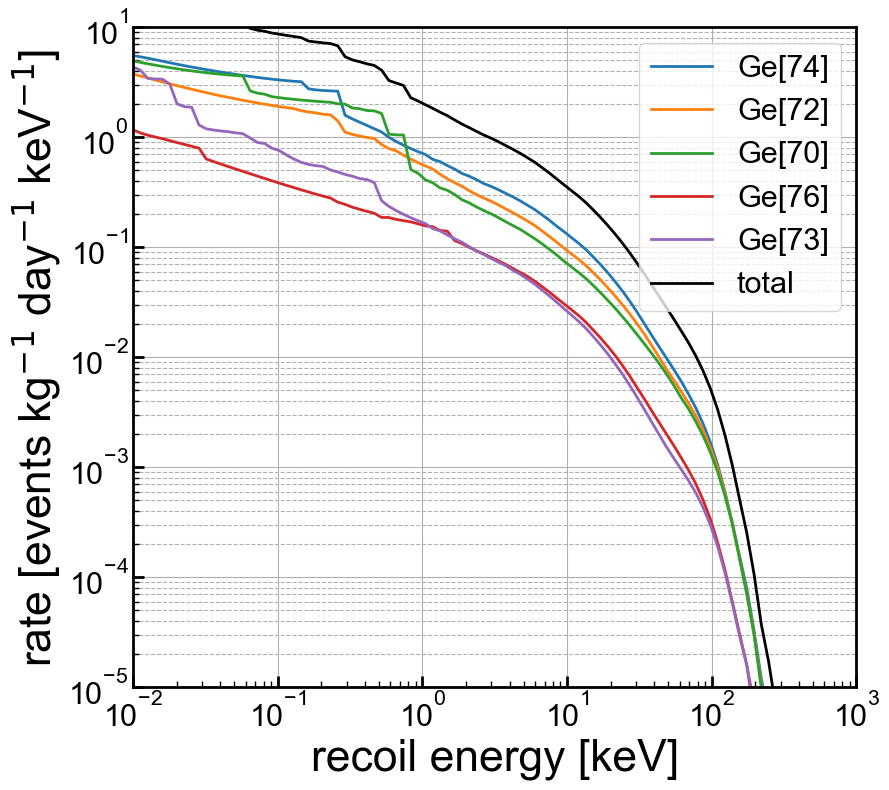

In [94]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#ax1.plot(Er, dRlow,label='low res')
count=0
for iso in isodictGe:
  ax1.plot(Er*1000, isodictGe[iso]*isoGe[:,count+1],label=iso)
  count+=1

ax1.plot(Er*1000, isoGe[:,0],color='k',label="total")




ymin = 1e-5
ymax = 1e1

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(1e-5*1000, 1*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/ge-nn-spec.png')
plt.show()

In [66]:
frs.dRdErCompound(Er,E,F,N=1,Comp='CaWO4')

Compound Isotope Breakdown Sum (should be 1.0):0.9984409269458859
{'O[16]': {'a': 0.6642622299763296}, 'Ca[40]': {'a': 0.16132288941401166}, 'W[184]': {'a': 0.0509870500027032}, 'W[186]': {'a': 0.0473094592551192}, 'W[182]': {'a': 0.04409780760677661}, 'W[183]': {'a': 0.023812816107659365}, 'Ca[44]': {'a': 0.0034713851447543183}, 'O[18]': {'a': 0.00136505465426133}, 'Ca[42]': {'a': 0.0010766952006980078}, 'Ca[48]': {'a': 0.0003111932032929327}, 'Ca[43]': {'a': 0.00022465819489061987}, 'W[180]': {'a': 0.00019968818538917702}}
